# RandomForestClassifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('A.csv')
df.head()

,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,6.6,37,1,1,1,1,255,high
3,6.8,45,0,1,1,1,255,high
4,6.6,45,0,1,1,1,250,high


In [3]:
df=df.dropna()
df.head()

,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,6.6,37,1,1,1,1,255,high
3,6.8,45,0,1,1,1,255,high
4,6.6,45,0,1,1,1,250,high


In [4]:
df.columns

Index(['pH', 'Temperature', 'Taste', 'Odour', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Grade']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
df.head()

,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,6.6,37,1,1,1,1,255,0
3,6.8,45,0,1,1,1,255,0
4,6.6,45,0,1,1,1,250,0


In [7]:
x1 = df.drop(labels='Grade', axis=1)
y1 = df.loc[:,'Grade']

In [8]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1: 429, 2: 374, 0: 256})
OVER SAMPLING DATA COUNT  :  Counter({0: 429, 1: 429, 2: 429})


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  1029
NUMBER OF TEST DATASET      :  258
TOTAL NUMBER OF DATASET    :  1287


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  1029
NUMBER OF TEST DATASET      :  258
TOTAL NUMBER OF DATASET    :  1287


In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, hamming_loss
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predicted = RFC.predict(x_test)

In [13]:
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        86

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [14]:
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n',cm)
print("\n")

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:

 [[86  0  0]
 [ 0 86  0]
 [ 0  0 86]]




In [15]:
accuracy = cross_val_score(RFC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n', accuracy*100)
print("\n")

THE CROSS VALIDATION TEST RESULT OF ACCURACY :

 [ 99.6124031  100.         100.         100.          99.22178988]




In [16]:
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS : 100.0


In [17]:
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS : 0.0


THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:
[[86  0  0]
 [ 0 86  0]
 [ 0  0 86]]


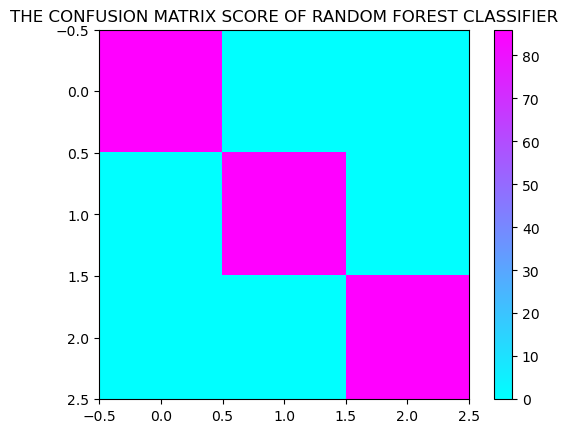

In [18]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:')
print(cm)
plot_confusion_matrix(cm)

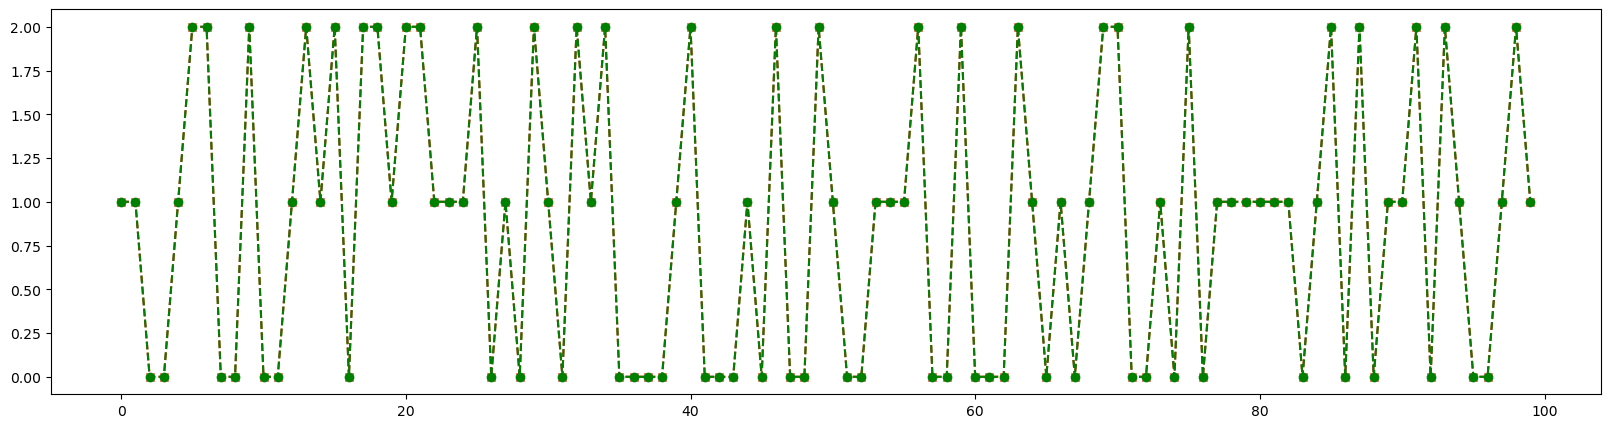

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [20]:
import joblib
joblib.dump(RFC, 'model.pkl')

['model.pkl']